## MALL CUSTOMERS SPENDING SCORE PREDICTOR

#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- This project understands how the Customer's Spending (Spending Score) in mall is affected by other variables such as Gender, Age and Annual Income.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/shwetabh123/mall-customers

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [4]:
df = pd.read_csv('data/Mall_Customers.csv')

#### Show Top 5 Records

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Shape of the dataset

In [6]:
df.shape

(200, 5)

#### Delete/Drop unwanted column

In [7]:
df.drop("CustomerID", axis=1, inplace=True)

### 2.2 Dataset information

- Gender : sex of Customer  -> (Male/female)
- Age : sex of Customer  -> (Group A, B,C, D,E)
- Annual Income: Annual Income in (k$)

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [8]:
df.isna().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#### There are no missing values in the data set

### 3.2 Check Duplicates

In [9]:
df.duplicated().sum()

0

#### There are no duplicates  values in the data set

### 3.3 Check data types

In [10]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


### 3.4 Checking the number of unique values of each column

In [11]:
df.nunique()

Gender                     2
Age                       51
Annual Income (k$)        64
Spending Score (1-100)    84
dtype: int64

### 3.5 Check statistics of data set

In [12]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


#### Insight
- there is a min spending score is 1 and and maximum spending score is 99

### 3.7 Exploring Data

In [13]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [14]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['Gender'].unique())

Categories in 'gender' variable:      ['Male' 'Female']


In [15]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

We have 1 categorical features : ['Gender']


In [16]:
df.head(5)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [17]:
Below_Spending_Score = df[df['Spending Score (1-100)'] <=33]['Spending Score (1-100)'].count()
average_Spending_Score = df[(df['Spending Score (1-100)'] >=34) & (df['Spending Score (1-100)']<=66) ]['Spending Score (1-100)'].count()
High_Spending_Score = df[df['Spending Score (1-100)'] >=67]['Spending Score (1-100)'].count()


print(f'Number of Customers with Below_Spending_Score: {Below_Spending_Score}')
print(f'Number of students with average_Spending_Score: {average_Spending_Score}')
print(f'Number of students with High_Spending_Score: {High_Spending_Score}')

Number of Customers with Below_Spending_Score: 49
Number of students with average_Spending_Score: 94
Number of students with High_Spending_Score: 57


### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1 Histogram & KDE

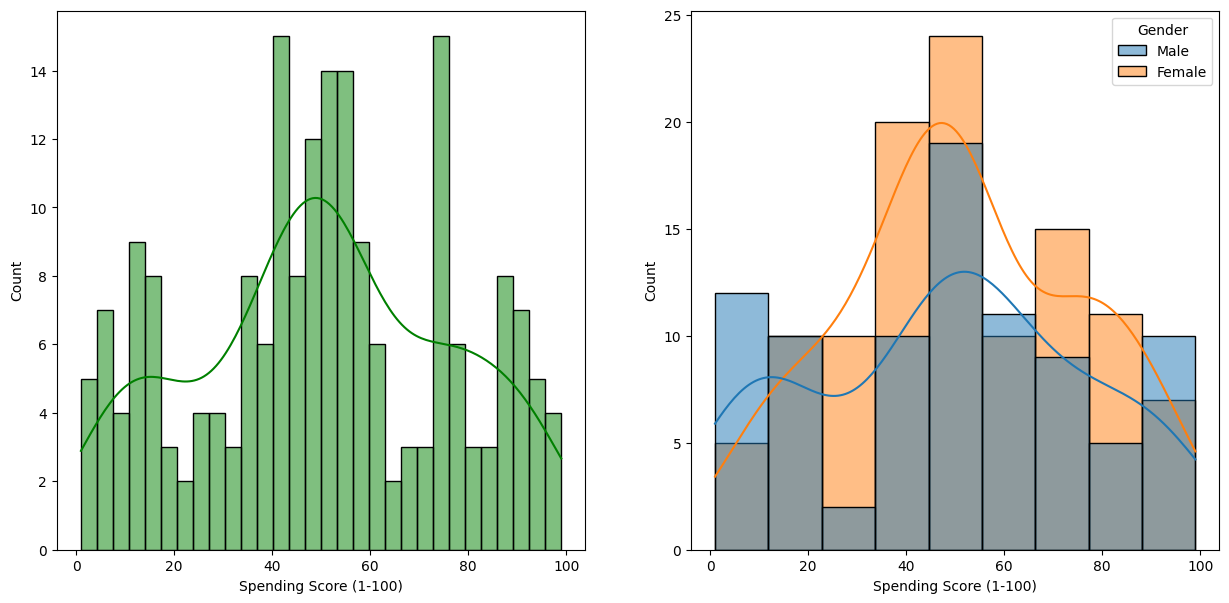

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Spending Score (1-100)',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Spending Score (1-100)',kde=True,hue='Gender')
plt.show()

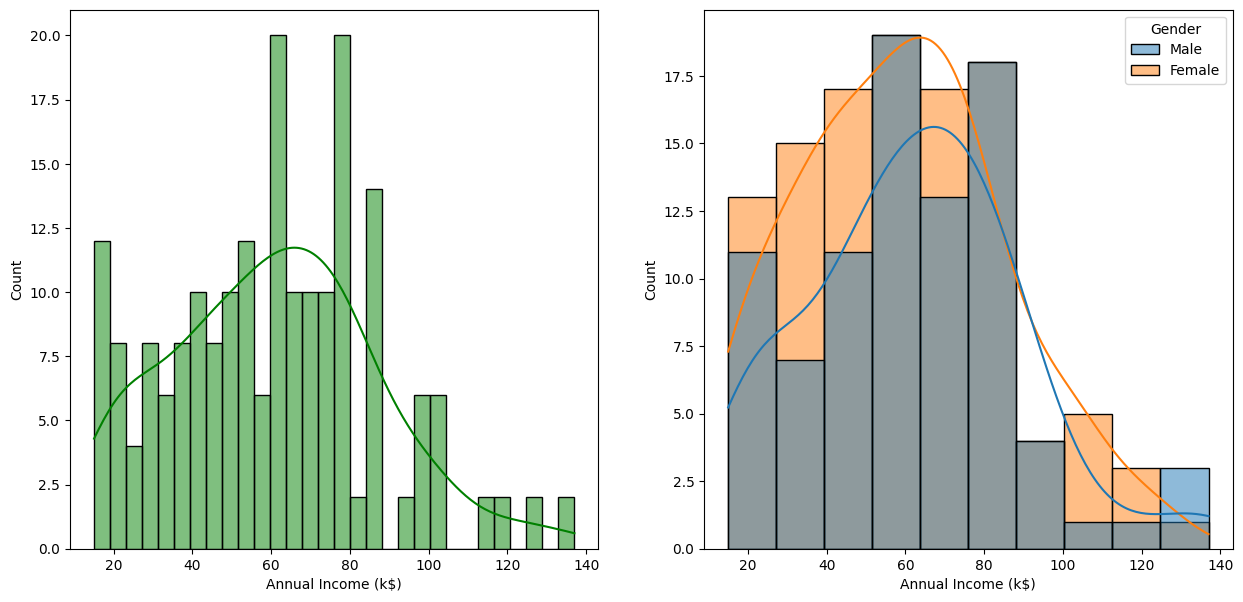

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Annual Income (k$)',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Annual Income (k$)',kde=True,hue='Gender')
plt.show()

#### 4.2 Maximumum score of students in all three subjects

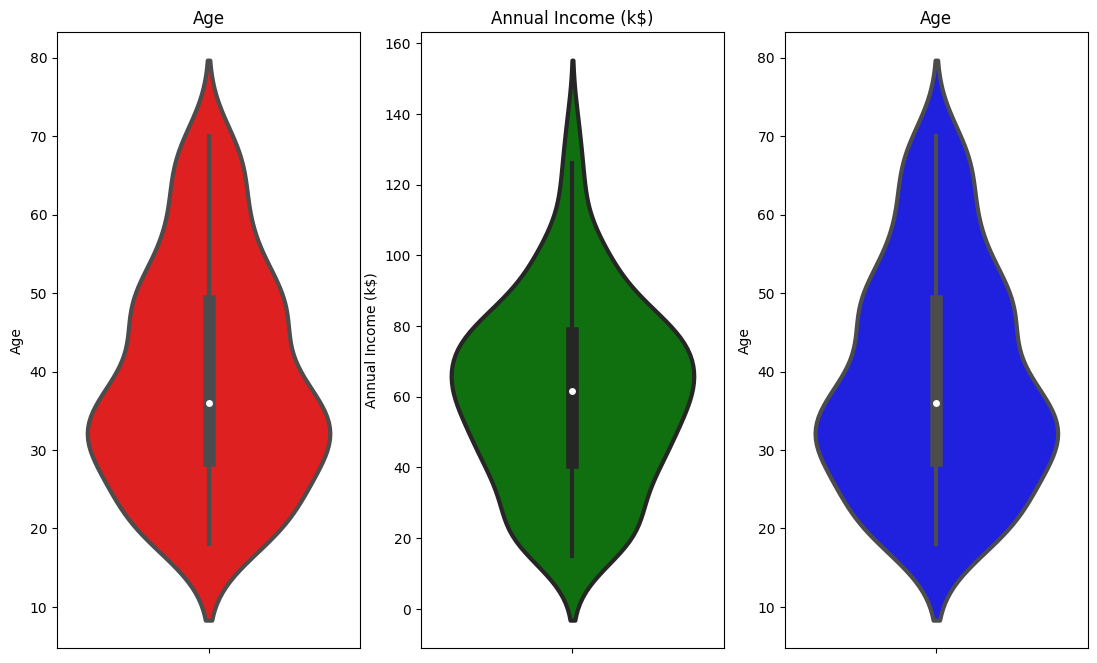

In [20]:

plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('Age')
sns.violinplot(y='Age',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('Annual Income (k$)')
sns.violinplot(y='Annual Income (k$)',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('Age')
sns.violinplot(y='Age',data=df,color='blue',linewidth=3)
plt.show()

#### 4.3 CHECKING OUTLIERS

<Axes: >

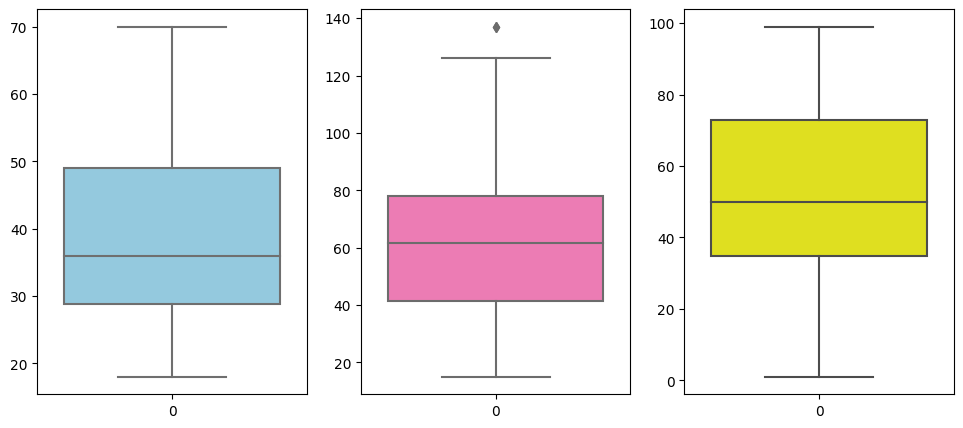

In [21]:
plt.subplots(1,3,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['Age'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['Annual Income (k$)'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['Spending Score (1-100)'],color='yellow')

#### 4.4 MUTIVARIATE ANALYSIS USING PAIRPLOT

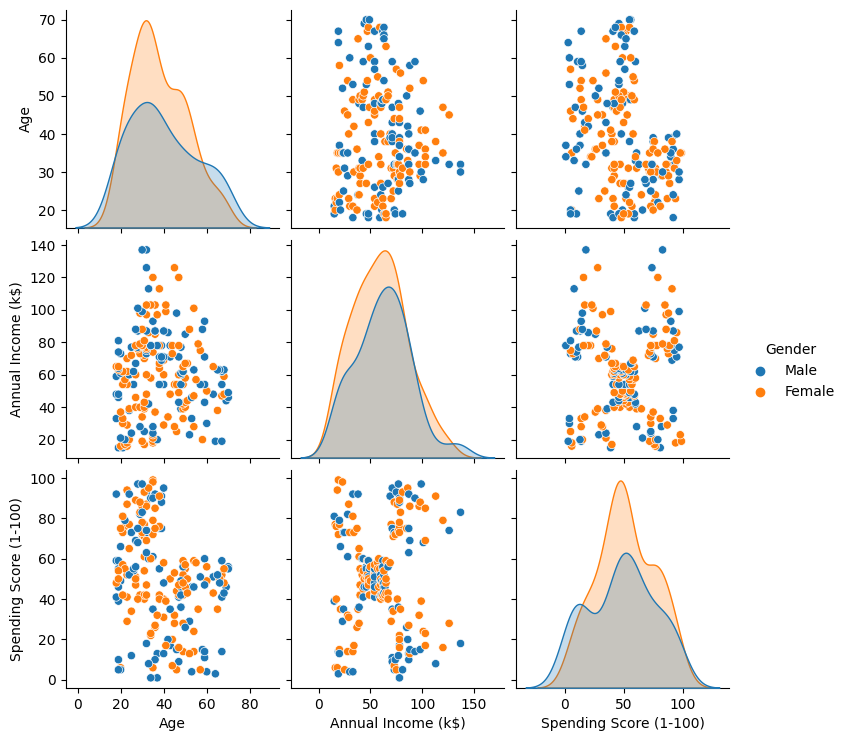

In [22]:
sns.pairplot(df,hue = 'Gender')
plt.show()